# Goodreads Books Reviews

**Authors: Tilova, Calvin, Clement**

---

### Introduction

Our goal is to perform a sentiment analysis on the Goodreads dataset where we will predict the book's rating based on the reviews.

https://www.kaggle.com/competitions/goodreads-books-reviews-290312/overview

### Data Dictionary For This Notebook:

---
| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| rating (**Dependant Variable**)| Rating between 0-5 | integer |
| review_text | The book review           | object |

## Table of Contents

---

1. [Data Wrangling](#wrangle)

**Importing Libraries**

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sk-learn text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# scalars
from sklearn.preprocessing import StandardScaler

# modelling
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'wrangle'></a>

### 1. Data Wrangling
---
Loading the CSVs files.

In [3]:
df_train = pd.read_csv('../data/goodreads_train.csv')

# First 5 rows of dataset
df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


We can remove the following columns `user_id`, `book_id`, and `review_id` since they do not provide any meaningful insights into predicting the rating.

In [4]:
df_train.drop(['user_id', 'book_id', 'review_id'], axis=1, inplace=True)

# sanity check
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        900000 non-null  int64 
 1   review_text   900000 non-null  object
 2   date_added    900000 non-null  object
 3   date_updated  900000 non-null  object
 4   read_at       808234 non-null  object
 5   started_at    625703 non-null  object
 6   n_votes       900000 non-null  int64 
 7   n_comments    900000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 54.9+ MB


There seems to be missing values in the `read_at` and `started_at` columns.

In [26]:
# size of the dataset
df_train.shape

(900000, 8)

In [6]:
# Let's look at the summary statistics of the dataset
df_train.describe()

,rating,n_votes,n_comments
count,900000.000000,900000.000000,900000.000000
mean,3.689639,3.294381,1.016656
std,1.252583,17.873553,5.963821
min,0.000000,-3.000000,-1.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000
max,5.000000,3222.000000,1335.000000


- The `rating` column seems to be pretty evenly distributed due to the mean average of 3.7, but we should analyze this further in a graph.
- Interesting to see how there are negative number of votes and comments.

Let's check the number of duplicates next:

In [8]:
df_train.duplicated().sum()

0

Great to see that there are no duplicates, now lets check the distribution of the ratings.

In [23]:
# Count the number of occurrences of each user rating in the 'rating' column

rating_counts = df_train['rating'].value_counts().sort_index()

print(rating_counts)

rating
0     30988
1     28718
2     72627
3    188972
4    313688
5    265007
Name: count, dtype: int64


There are a lot more books rated higher 3-5 than lower 0-2. This could affect our models! Let's visualize this on a bar chart.

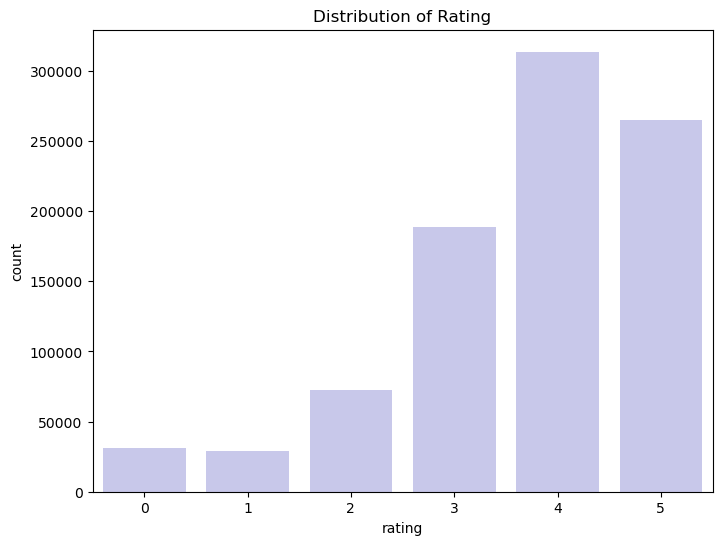

In [24]:
# Visualize the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_train, color='#c2c2f0')
plt.title('Distribution of Rating')
plt.show()

### Visualize Feature Relationships

**Tilova** you gotta rework this whole section!

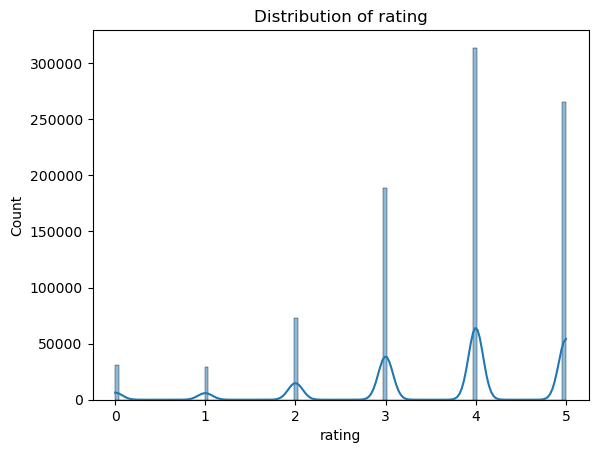

KeyboardInterrupt: 

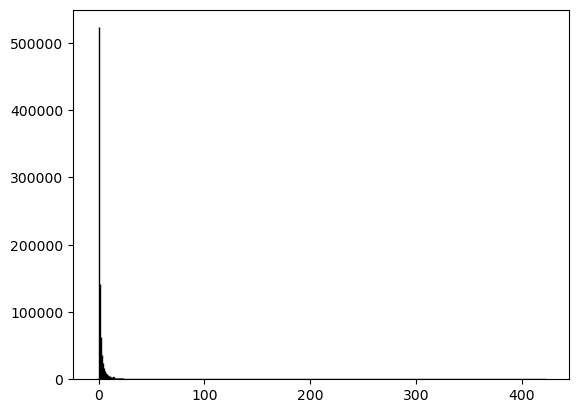

In [25]:
# Visualize the distribution of numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure()
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

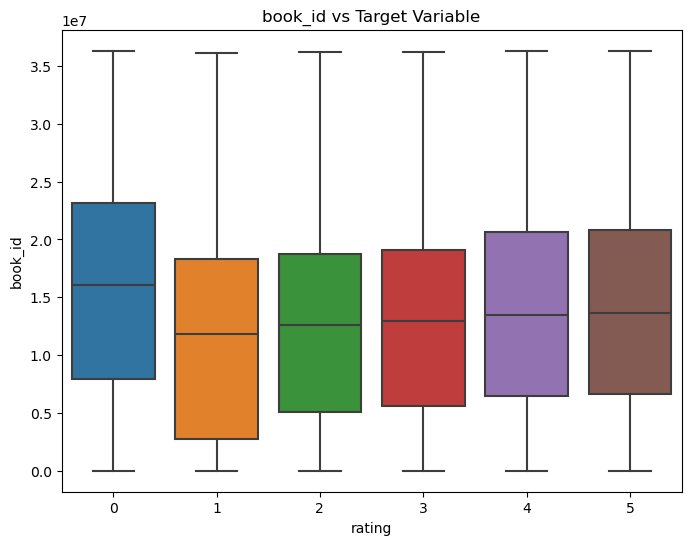

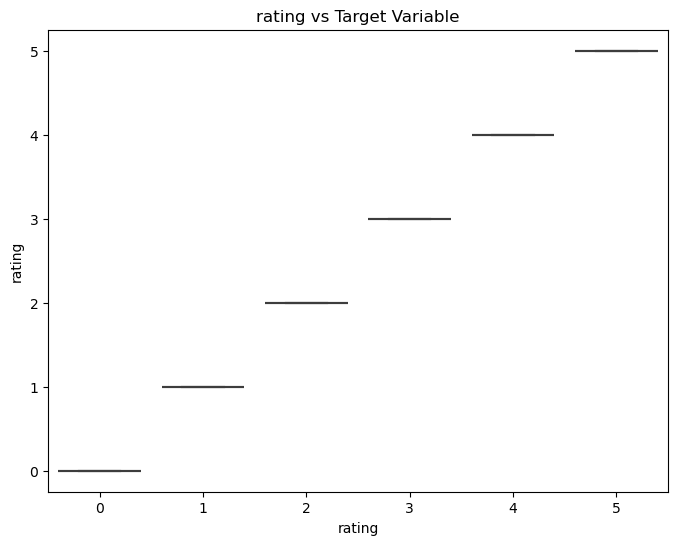

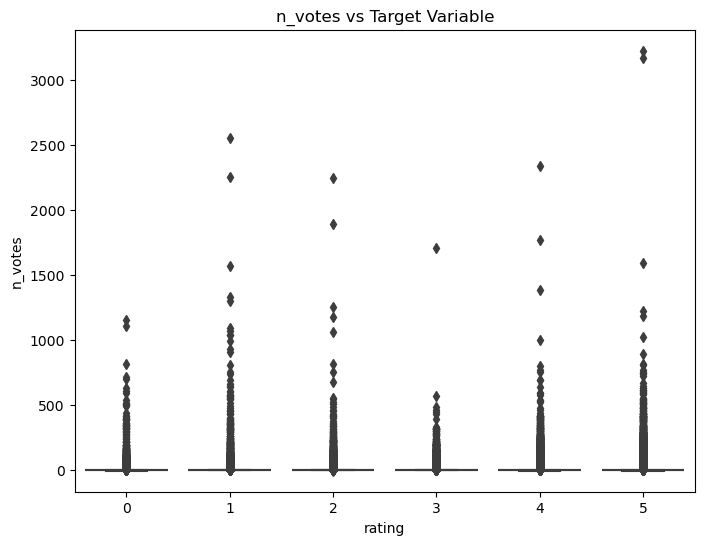

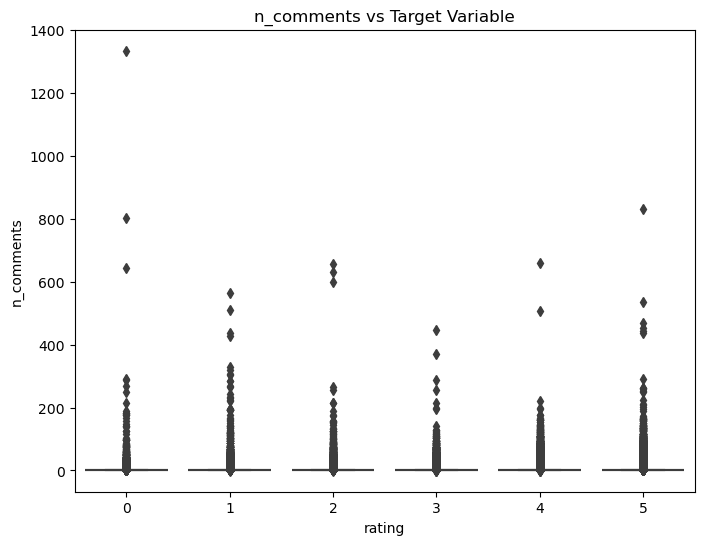

In [12]:
# Visualize the relationship between numerical features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rating', y=feature, data=df_train)
    plt.title(f'{feature} vs Target Variable')
    plt.show()

In [13]:
df_train.n_comments.describe()

count    900000.000000
mean          1.016656
std           5.963821
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1335.000000
Name: n_comments, dtype: float64

In [14]:
df_train.n_votes.describe()

count    900000.000000
mean          3.294381
std          17.873553
min          -3.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        3222.000000
Name: n_votes, dtype: float64

We can conclude that there is no correlation or relationship between rating and other categorical features, we can go ahead and drop them.

In [15]:
df_train.drop(["user_id", "book_id", "review_id", "date_added", "date_updated", "read_at", "started_at"], axis =1, inplace=True)

In [16]:
df_train.head()

,rating,review_text,n_votes,n_comments
0,5,This is a special book. It started slow for ab...,28,1
1,3,Recommended by Don Katz. Avail for free in Dec...,1,0
2,3,"A fun, fast paced science fiction thriller. I ...",22,0
3,0,Recommended reading to understand what is goin...,5,1
4,4,"I really enjoyed this book, and there is a lot...",9,1


### Text Processing

Now let's move on to processing our ratings and use them to create a model for us to predict book ratings. 

In [28]:
X = df_train['review_text']
y = df_train['rating']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape, X_test.shape

((630000,), (270000,))

In [40]:
# Initialize CountVectorizer
bow = CountVectorizer(stop_words='english', max_features=500)

# Fit and transform the review columns
X_train_vectorized = bow.fit_transform(X_train)
X_test_vectorized = bow.transform(X_test)

In [42]:
# convert sparse matrix into dataframe
# Source(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html)
X_train_dense = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=bow.get_feature_names_out()).sparse.to_dense()
X_test_dense = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=bow.get_feature_names_out()).sparse.to_dense()

# First 5 rows of training data
X_train_dense.head()

,able,absolutely,action,actual,actually,admit,adult,age,ago,amazing,...,write,writing,written,wrong,ya,yeah,year,years,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Modeling

Let's start with some basic Logistic Regression.

Before we fit the data on a linear model, we should scale it for more robustness.

In [43]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler into the training set
ss.fit(X_train_dense)

# transform the train and testing set
X_train_ss = ss.transform(X_train_dense)
X_test_ss = ss.transform(X_test_dense)

In [46]:
# instantiate model
base_logreg = LogisticRegression()

# Fit the classifier
base_logreg.fit(X_train_ss, y_train)

LogisticRegression()

In [47]:
print(f"Train score: {base_logreg.score(X_train_ss, y_train)}")
print(f"Test score: {base_logreg.score(X_test_ss, y_test)}")

Train score: 0.4808873015873016
Test score: 0.4786074074074074


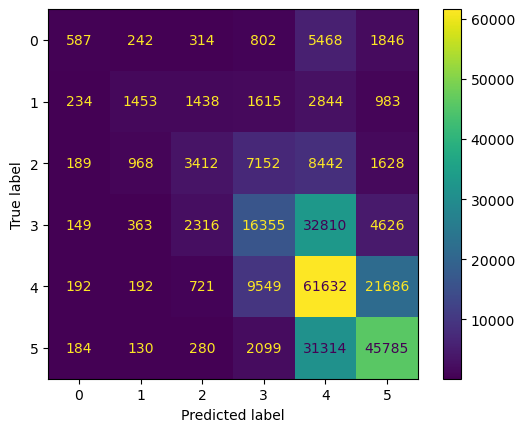

In [50]:
# Get class predictions
y_pred = base_logreg.predict(X_test_ss)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(base_logreg, X_test_ss, y_test)
plt.title("Test Data Confusion Matrix")
plt.show()

As we can see from the confusion matrix above, Logistic Regression is not the best at predicting the ratings through NLP. We can see a lot of true label 4's are being predicted as label 5's, labels 3 and 5 and some of labels 0 and 2 are being predicted as 4's, labels 2 and 4 are being predicted as 3's. This is more apparent if we look at the classification report. 

In [51]:
base_logreg_report = classification_report(y_test, y_pred)
print(base_logreg_report)

              precision    recall  f1-score   support

           0       0.38      0.06      0.11      9259
           1       0.43      0.17      0.24      8567
           2       0.40      0.16      0.23     21791
           3       0.44      0.29      0.35     56619
           4       0.43      0.66      0.52     93972
           5       0.60      0.57      0.59     79792

    accuracy                           0.48    270000
   macro avg       0.45      0.32      0.34    270000
weighted avg       0.48      0.48      0.46    270000



We see from this classification report practically all classes have really low precision and recall scores meaning we our model is performing poorly and we should use a different possibly more advanced model. 